# Playing around with Keras machine learning..

Scaling up from difficulty.

Fully-Connected network (Forward model)

# Packages

In [1]:
from keras.models import Model, Sequential
from keras.layers import Input, ZeroPadding2D
from keras.layers import Dense, BatchNormalization
from keras.layers.merge import concatenate
from keras.optimizers import Adam, RMSprop
from keras.layers import Dense, Activation, Flatten, Reshape, Conv2D
from keras.layers import Conv2DTranspose, UpSampling2D, LeakyReLU, Dropout
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


Using TensorFlow backend.


# Load Data

In [2]:
# Load the Drive helper and mount (Authorization)
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import h5py
import pandas as pd
os.chdir('/content/drive/My Drive/LLNL')

In [4]:
def load_data(train_path,test_path):
    # read in Data
    tests_data = test_path ; train_data = train_path;
    ts_df = h5py.File(tests_data,'r') ; tr_df = h5py.File(train_data,'r') ;
    # Scan for images and grab labels
    y_train = np.array(tr_df['images'])
    X_train = np.array([tr_df['images'][i][0] for i in y_train])
    y_test = np.array(ts_df['images'])
    X_test = np.array([ts_df['images'][i][0] for i in y_test])

    # close h5py
    ts_df.close() ; tr_df.close()
    return (X_train*1.0, y_train),(X_test*1.0, y_test)

train_path = 'new_training_data.h5'
test_path = 'new_test_data.h5'
(X_train,y_train),(X_test,y_test) = load_data(train_path,test_path)
X_train.shape

(16771, 100, 100)

In [0]:
# Parameter Data to use
train_df = pd.read_csv("param_search.csv", sep = ",")
test_df = pd.read_csv("param_search2.csv", sep = ",")

# Manipulate Data

In [0]:
# Resizing data to 25 by 25 image. (Do NOT write over it.)
import scipy.ndimage as ndi
X_train = ndi.zoom(X_train, (1, .25, .25), order=2)
X_test = ndi.zoom(X_test, (1, .25, .25), order=2)
np.shape(X_train) + np.shape(X_test)

In [0]:
# Normalize Data.
X_train = (X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train))
X_test = (X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test))

# Keras Sequential Model..

In [23]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(3,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(625, activation=None))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_4 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_5 (Dense)              (None, 625)               320625    
Total params: 493,809
Trainable params: 493,809
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='mean_squared_error',optimizer=RMSprop(),metrics=['mean_squared_error'])

# Training Model

In [26]:
model.fit(train_df,np.reshape(X_train,(16771,625)), batch_size = 32, epochs = 4)

Instructions for updating:
Use tf.cast instead.
Epoch 1/4
16771/16771 [==============================] - 6s 356us/step - loss: 0.0531 - mean_squared_error: 0.0531
Epoch 2/4
16771/16771 [==============================] - 5s 320us/step - loss: 0.0050 - mean_squared_error: 0.0050
Epoch 3/4
16771/16771 [==============================] - 6s 340us/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 4/4
16771/16771 [==============================] - 6s 341us/step - loss: 0.0033 - mean_squared_error: 0.0033


# Predictions

First image is out of sample. Second image is out of sample.

In [27]:
# Grab image from dataset.
print(train_df.iloc[50:51,])
print(test_df.iloc[100:101,])

           p        phi       theta
50 -0.786348  56.876568  101.787616
            p   phi       theta
100 -0.786348  90.0  164.850871


### Out of Sample

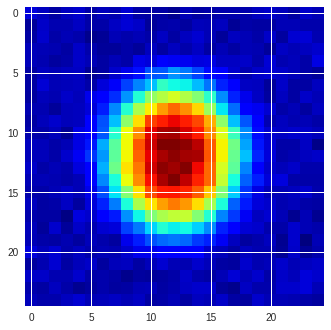

In [42]:
huh = model.predict(test_df.iloc[0:1,])
plt.imshow(np.reshape(huh,(25,25)),cmap = 'jet')

Real Image Comparison for Out of Sapmle

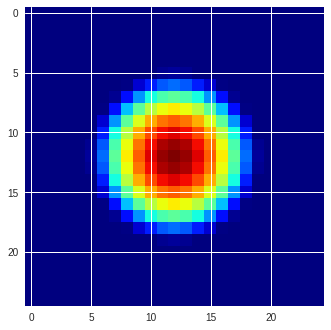

In [43]:
plt.imshow(np.reshape(X_test[0], (25,25)), cmap = 'jet')

### In Sample

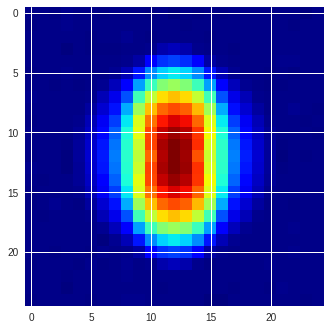

In [44]:
huh = model.predict(train_df.iloc[1000:1001,])
plt.imshow(np.reshape(huh,(25,25)),cmap = 'jet')

Real image for in sample

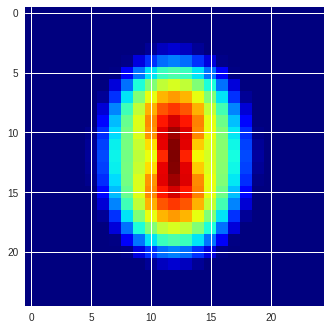

In [45]:
plt.imshow(np.reshape(X_train[1000], (25,25)), cmap = 'jet')